<a href="https://colab.research.google.com/github/shirin1309/Age-and-Gender-Detection/blob/main/gender_model_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shirinsaf","key":"0a00dba283f8735c852f06946a37faa1"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                                title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/netflix-tv-shows-and-movies                           Netflix TV Shows and Movies                           2MB  2022-05-15 00:01:23          12856        380  1.0              
zusmani/petrolgas-prices-worldwide                                 Petrol/Gas Prices Worldwide                          10KB  2022-06-24 01:25:33           1225         74  1.0              
ruchi798/data-science-job-salaries                                 Data Science Job Salaries                             7KB  2022-06-15 08:59:12           2102         74  1.0              
devansodariya/student-performance-data       

In [ ]:
! kaggle datasets download cashutosh/gender-classification-dataset

gender-classification-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip gender-classification-dataset.zip

Archive:  gender-classification-dataset.zip
replace Training/female/131422.jpg.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
#import shutil
#shutil.copy("","/content/drive/MyDrive/folder_name")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from keras.models import load_model

NUM_CLASSES = 2

CHANNELS = 3

IMAGE_RESIZE = 96

NUM_EPOCHS = 100

STEPS_PER_EPOCH_TRAINING = 132
STEPS_PER_EPOCH_VALIDATION = 10

BATCH_SIZE_TRAINING = 356
BATCH_SIZE_VALIDATION = 132

BATCH_SIZE_TESTING = 1

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import Model
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer, GlobalAveragePooling2D, LeakyReLU
from keras.models import Sequential
from keras import optimizers

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

image_size = IMAGE_RESIZE

data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = data_generator.flow_from_directory(
        '/content/Training',
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_TRAINING,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        '/content/Validation',
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_VALIDATION,
        class_mode='categorical') 

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'female': 0, 'male': 1}

In [ ]:
def conv_pool_cnn(dim=224,freeze_layers=10,full_freeze='N'):

  model = ResNet50(include_top=False)
  x = model.output
  x = GlobalAveragePooling2D()(x)
  
  model = Model(inputs = model.input,outputs=x)
  
  model_final = Sequential()
  model_final.add(model)
  
  model_final.add(Dense(2048))
  model_final.add(LeakyReLU(alpha=0.2))
  model_final.add(Dropout(0.25))
  
  model_final.add(Dense(1024))
  model_final.add(LeakyReLU(alpha=0.2))
  model_final.add(Dropout(0.5))
  
  model_final.add(Dense(512))
  model_final.add(LeakyReLU(alpha=0.2))
  model_final.add(Dropout(0.5))
  
  model_final.add(Dense(256))
  model_final.add(LeakyReLU(alpha=0.2))
  model_final.add(Dropout(0.5))
  model_final.add(Dense(2,activation='softmax'))
  
  model_final.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  
  
  if full_freeze != 'N':
    for layer in model.layers[0:freeze_layers]:
      layer.trainable = False
  model_final.summary()
  return model_final



In [ ]:
model =conv_pool_cnn()



#(BATCH_SIZE_TRAINING, len(train_generator), BATCH_SIZE_VALIDATION, len(validation_generator))





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 2048)              4196352   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 1024)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0

In [ ]:
fit_history = model.fit_generator(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH_TRAINING,
        epochs = NUM_EPOCHS,
        validation_data=validation_generator,
        validation_steps=STEPS_PER_EPOCH_VALIDATION
)

model.save('new_age_model.hdf5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100
132/132 [==============================] - 126s 777ms/step - loss: 0.1776 - accuracy: 0.9407 - val_loss: 0.2240 - val_accuracy: 0.9492
Epoch 2/100
132/132 [==============================] - 102s 769ms/step - loss: 0.0878 - accuracy: 0.9698 - val_loss: 0.1898 - val_accuracy: 0.9477
Epoch 3/100
132/132 [==============================] - 101s 768ms/step - loss: 0.0889 - accuracy: 0.9693 - val_loss: 0.2229 - val_accuracy: 0.9402
Epoch 4/100
132/132 [==============================] - 101s 767ms/step - loss: 0.0648 - accuracy: 0.9764 - val_loss: 0.2159 - val_accuracy: 0.9341
Epoch 5/100
132/132 [==============================] - 102s 770ms/step - loss: 0.0447 - accuracy: 0.9838 - val_loss: 0.1648 - val_accuracy: 0.9500
Epoch 6/100
132/132 [==============================] - 102s 770ms/step - loss: 0.0474 - accuracy: 0.9829 - val_loss: 0.5809 - val_accuracy: 0.8917
Epoch 7/100
132/132 [==============================] - 102s 770ms/step - loss: 0.0577 - accuracy: 0.9798 - val_loss: 0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


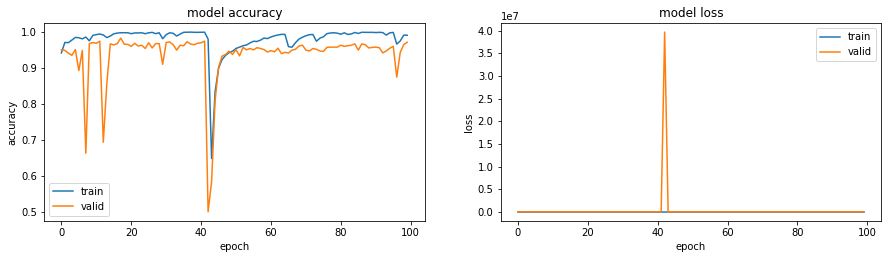

Found 11649 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


11649/11649 [==============================] - 114s 10ms/step
[0 0 0 ... 1 1 1]


In [ ]:
print(fit_history.history.keys())

plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(fit_history.history['accuracy'])  
plt.plot(fit_history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(fit_history.history['loss'])  
plt.plot(fit_history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

test_generator = data_generator.flow_from_directory(
    directory = '/content/Validation',
    target_size = (image_size, image_size),
    batch_size = BATCH_SIZE_TESTING,
    class_mode = None,
    shuffle = False,
    seed = 123
)

test_generator.reset()

pred = model.predict_generator(test_generator, steps = len(test_generator), verbose = 1)

predicted_class_indices = np.argmax(pred, axis = 1)

print(predicted_class_indices)

In [ ]:
model.save('/content/drive/MyDrive/models/new_gender_model.hdf5')

In [ ]:
a=load_model('/content/drive/MyDrive/models/new_gender_model.hdf5')

In [ ]:
from keras.models import load_model
import cv2
import numpy as np

model = a

#model.compile(loss='categorical_crossentropy',
            #  optimizer='adam',
            #  metrics=['accuracy'])

img = cv2.imread('/content/m3.jpg')
img = cv2.resize(img,(96,96))
img = np.reshape(img,[1,96,96,3])

#classes = model.predict_classes(img)
gen=model.predict(img)
gen_ind=np.argmax(gen)
print(gen_ind)
#print(classes)
gender_bucket=['female','male']
print(gender_bucket[gen_ind])

1
male


In [ ]:
#image=cv2.imread("/content/m3.jpg")


In [ ]:
a.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 2048)              4196352   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 1024)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0